In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="Set2")

# Context

In [347]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


# Data quality assessment

In [349]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

Missing values
__________________________
Age has 3292 missing value
Fare has 134 missing value
Tickets has 4623 missing value
Embarked has 250 missing value
...

In [350]:
# Change missing value
df['Age'].fillna(df['Age'].mean(), inplace = True) # replace missing Age on mean value

df[df['Pclass'] == 1]['Fare'].fillna(df[df['Pclass'] == 1]['Fare'].mean(), inplace = True) # replace missing Fare on mean value Pclass = 1
df[df['Pclass'] == 2]['Fare'].fillna(df[df['Pclass'] == 2]['Fare'].mean(), inplace = True) # replace missing Fare on mean value Pclass = 2
df[df['Pclass'] == 3]['Fare'].fillna(df[df['Pclass'] == 3]['Fare'].mean(), inplace = True) # replace missing Fare on mean value Pclass = 3
df['Embarked'].fillna('S', inplace = True)

/home/user/PycharmProjects/DataSpell_venv/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [386]:
# Add new column
df['Age_group'] = df['Age'].map(lambda age: int(age // 10) + 1)
df['Alone'] = df.Parch + df.SibSp
df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Without Family'
df.groupby('Age_group')['Survived'].value_counts()

/home/user/PycharmProjects/DataSpell_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Age_group  Survived
1          0            5130
           1            3481
2          0            2744
           1            2255
3          0           13515
           1            6768
4          0           11740
           1            7335
5          0            8254
           1            7423
6          0            9623
           1            8511
7          1            5481
           0            5338
8          1            1455
           0             863
9          1              65
           0              19
Name: Survived, dtype: int64

# Data exploration

Survived   Died  Survived
Sex                      
female    12660     31226
male      44566     11548


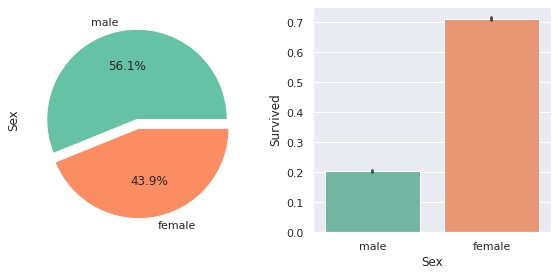

In [243]:
male_fenale_stat = df.groupby('Sex')['Survived'].value_counts() \
    .reset_index(name="Number") \
    .pivot(index='Sex', columns='Survived', values='Number') \
    .rename(columns={0:'Died', 1:'Survived'})
print(male_fenale_stat)
f, ax=plt.subplots(1,2,figsize=(8,4))

df['Sex'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0])
sns.barplot(x = 'Sex', y = 'Survived', data = df, ax=ax[1])
plt.tight_layout()

,Sex,Survived
0,female,0.711525
1,male,0.205795


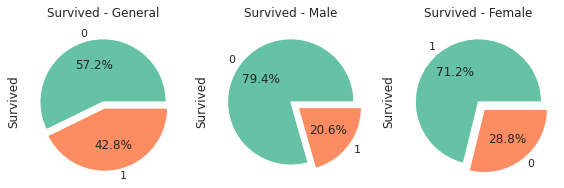

In [120]:
f,ax=plt.subplots(1,3,figsize=(8,4))
df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0])
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.15],autopct='%1.1f%%',ax=ax[1])
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.15],autopct='%1.1f%%',ax=ax[2])

ax[0].set_title('Survived - General')
ax[1].set_title('Survived - Male')
ax[2].set_title('Survived - Female')
plt.tight_layout()
df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

In [215]:
male_fenale_stat = df.groupby('Sex')['Survived'].value_counts() \
    .reset_index(name="Number") \
    .pivot(index='Sex', columns='Survived', values='Number') \
    .rename(columns={0:'Died', 1:'Survived'})

<AxesSubplot:ylabel='Sex'>

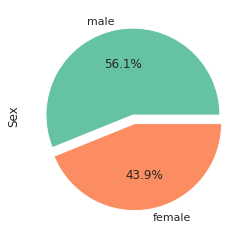

In [206]:
df['Sex'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%')

Survived  Pclass   Died  Survived  Total  Persent_Survived
0              1  12739     17576  30315          0.579779
1              2  13622     15057  28679          0.525018
2              3  30865     10141  41006          0.247305


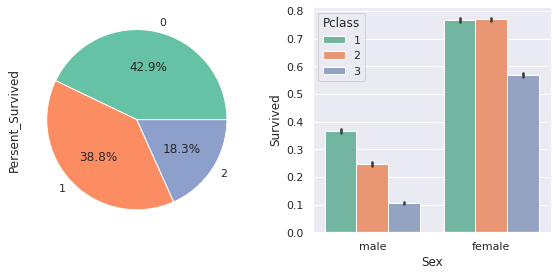

In [167]:
gr_class= df.groupby('Pclass')['Survived'].value_counts().reset_index(name="Number")
stat_by_class = pd.pivot(gr_class, index='Pclass', columns='Survived', values='Number') \
    .reset_index() \
    .rename(columns={0:'Died', 1:'Survived'})
stat_by_class['Total'] = stat_by_class['Survived']+stat_by_class['Died']
stat_by_class['Persent_Survived'] = stat_by_class['Survived'] / stat_by_class['Total']
stat_by_class
print(stat_by_class)

f,axs=plt.subplots(1,2,figsize=(8,4))
stat_by_class['Persent_Survived'].plot.pie(autopct='%1.1f%%', ax=axs[0])
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df, palette="Set2",ax=axs[1])

plt.tight_layout()

             Survived
Embarked             
Cherbourg    0.751296
Queenstown   0.596976
Southampton  0.315891


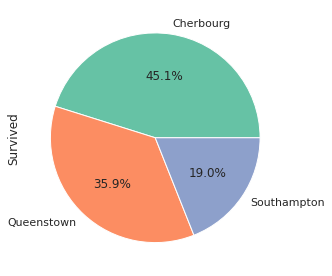

In [332]:
embarked_survived=df.pivot_table(values=['Survived'], index='Embarked')\
    .rename({'C': 'Cherbourg', 'S': 'Southampton', 'Q': 'Queenstown' })
print(embarked_survived)
embarked_survived['Survived'].plot.pie(autopct='%1.1f%%')
plt.tight_layout()

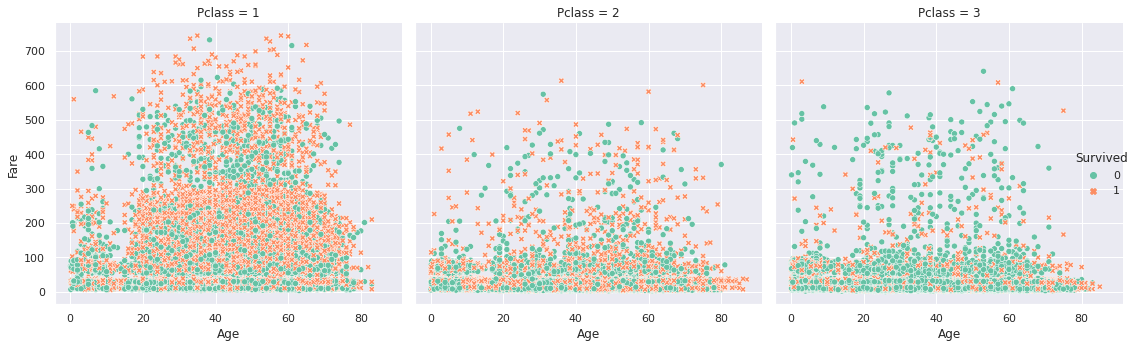

In [170]:
sns.relplot(
    data=df,
    x="Age", y="Fare", col="Pclass",
    hue="Survived", style="Survived"
)
plt.tight_layout()

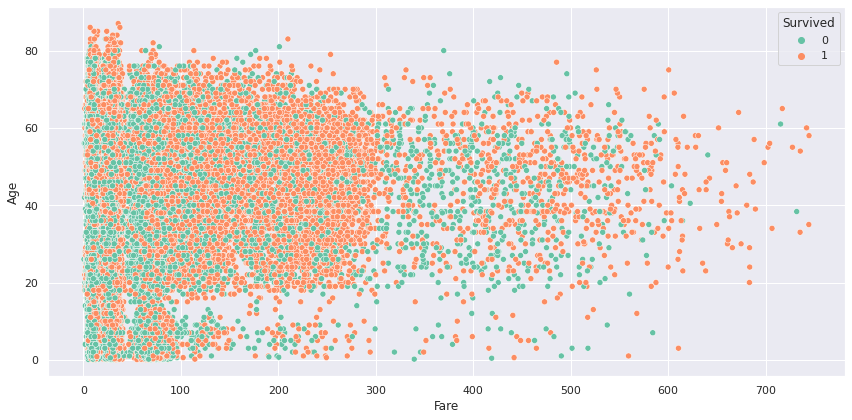

In [336]:
fig, axs = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Fare', y= 'Age', data=df, hue='Survived')
plt.tight_layout()

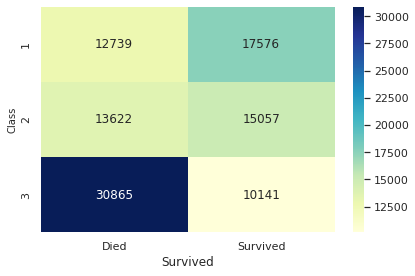

In [245]:
s = sns.heatmap(stat_by_class[['Died', 'Survived']],annot=True, fmt="d",xticklabels='auto', yticklabels=stat_by_class['Pclass'], cmap="YlGnBu")
s.set_ylabel('Class', fontsize=10)
plt.tight_layout()

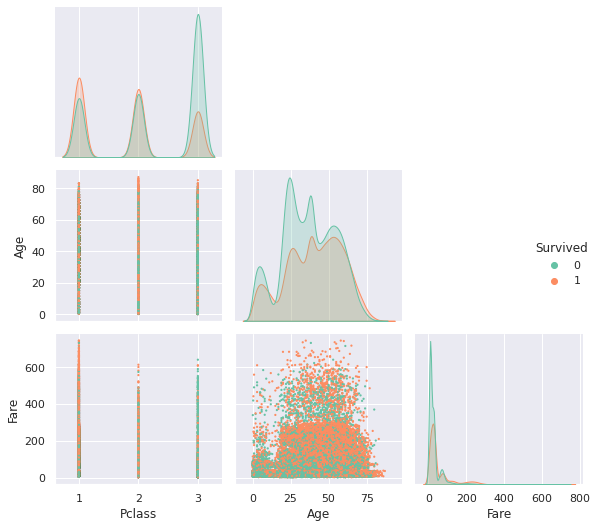

In [90]:
numeric_cols = ['Pclass','Age', 'Fare']
sns.pairplot(df, hue='Survived', vars=numeric_cols, plot_kws={'s':5, 'edgecolor':'none'}, corner=True)
plt.tight_layout()

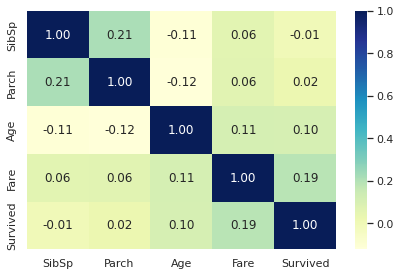

In [246]:
corr_value = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(df[corr_value].corr(), annot = True, fmt = ".2f" ,cmap="YlGnBu")
plt.tight_layout()

   Cabin  Number_cabin
0      1         22550
1      2          3823
2      3           553
3      4            52
4      5            13
5      6             1


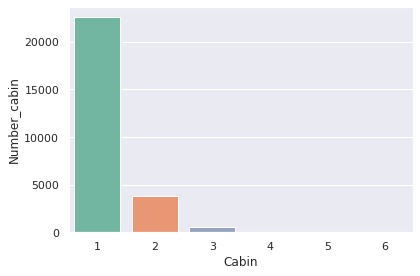

In [91]:
# Cabin distribution
var_cabin = df.Cabin.value_counts().reset_index()\
    .groupby('Cabin').size()\
    .reset_index() \
    .rename(columns = {0:'Number_cabin'})

print(var_cabin)
sns.barplot(x="Cabin", y = 'Number_cabin', data=var_cabin)
plt.tight_layout()

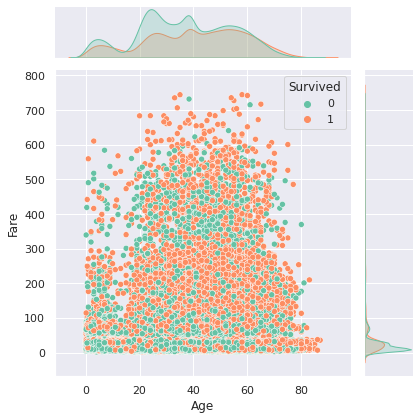

In [101]:
sns.jointplot(data=df, x="Age", y="Fare", hue="Survived")
plt.tight_layout()

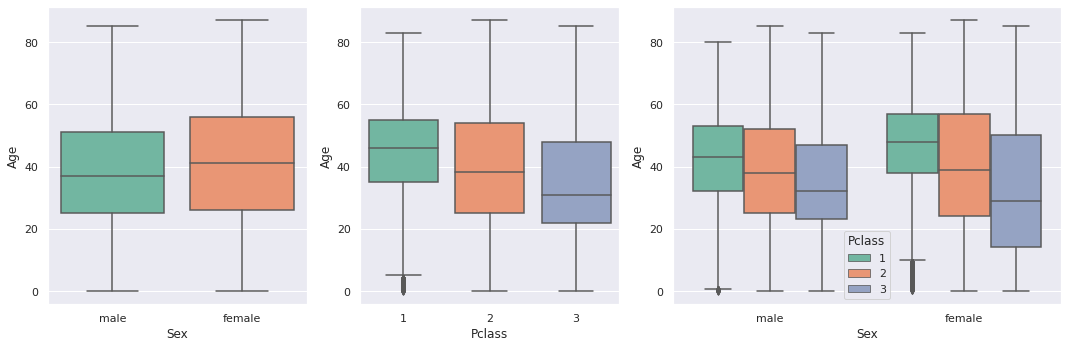

In [307]:
f, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw=dict(width_ratios=[2, 2, 3]))
sns.boxplot(x='Sex', y='Age', data = df, ax=axs[0])
sns.boxplot(x='Pclass', y='Age', data = df, ax=axs[1])
sns.boxplot(x = "Sex", y = "Age", hue = "Pclass",data = df, ax=axs[2])
plt.tight_layout()

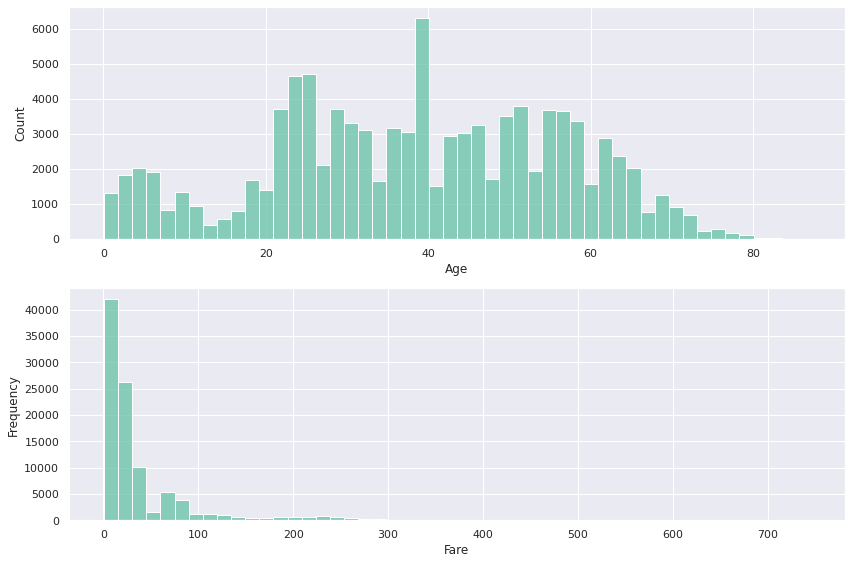

In [178]:
f, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw=dict(height_ratios=[2, 2]))

sns.histplot(df['Age'], bins = 50, ax=axs[0])
plt.xlabel('Age')
plt.ylabel("Frequency")

#
sns.histplot(df['Fare'], bins = 50, ax=axs[1])
plt.xlabel('Fare')
plt.ylabel("Frequency")
plt.tight_layout()

In [333]:
survival_class = pd.crosstab(df.Pclass, df.Survived, margins=True)
print('%  survided by Class')
print("Pclass=1 : ", (df.Survived[df.Pclass == 1].sum()/df[df.Pclass == 1].Survived.count()).round(2))
print("Pclass=2 : ", (df.Survived[df.Pclass == 2].sum()/df[df.Pclass == 2].Survived.count()).round(2))
print("Pclass=3 : ", (df.Survived[df.Pclass == 3].sum()/df[df.Pclass == 3].Survived.count()).round(2))
plt.tight_layout()

%  survided by Class
Pclass=1 :  0.58
Pclass=2 :  0.53
Pclass=3 :  0.25


<Figure size 432x288 with 0 Axes>

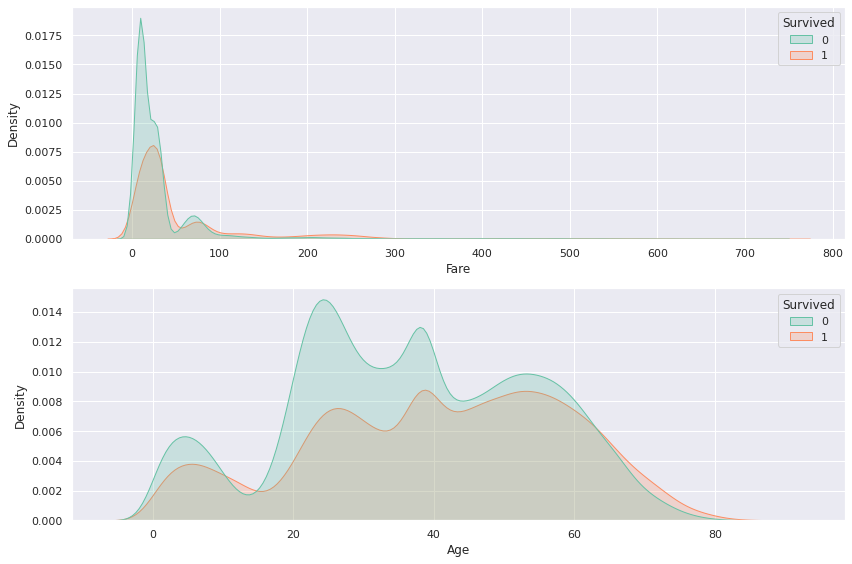

In [334]:
fig, axs = plt.subplots(figsize=(12, 8), nrows=2)
sns.kdeplot(x='Fare',data=df,hue='Survived', shade=True, ax=axs[0])
sns.kdeplot(x='Age',data=df,hue='Survived', shade=True, ax=axs[1])


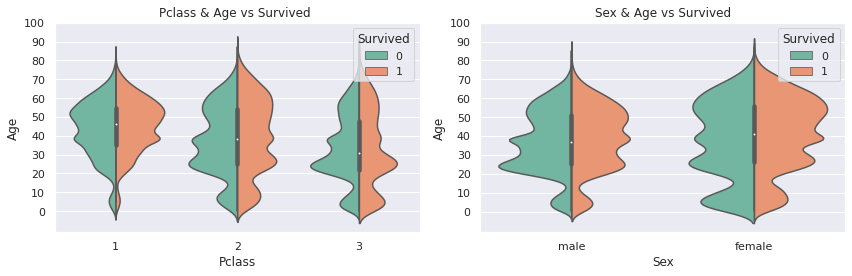

In [337]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass & Age vs Survived ')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, ax=ax[1])
ax[1].set_title('Sex & Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.tight_layout()

Survived,group_name,number_of_Died,number_of_Survived,total,died,survived
0,0-10,5130,3481,8611,0.595750,0.404250
1,10-20,2744,2255,4999,0.548910,0.451090
2,20-30,13515,6768,20283,0.666322,0.333678
3,30-40,11740,7335,19075,0.615465,0.384535
4,40-50,8254,7423,15677,0.526504,0.473496
5,50-60,9623,8511,18134,0.530661,0.469339
6,60-70,5338,5481,10819,0.493391,0.506609
7,70-80,863,1455,2318,0.372304,0.627696
8,80-90,19,65,84,0.226190,0.773810


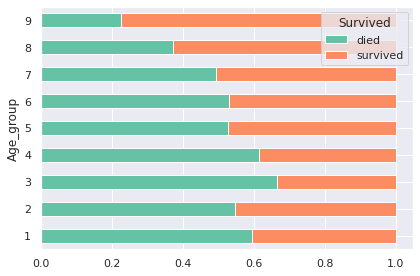

In [379]:
agg_cat = ['0-10', '10-20','20-30', '30-40','40-50', '50-60','60-70', '70-80', '80-90']
age_by_survived = df.groupby(['Age_group', 'Survived'])
age_by_survived = age_by_survived.size().unstack()
age_by_survived['total'] = age_by_survived[0]+age_by_survived[1]
age_by_survived['died'] = age_by_survived[0] / age_by_survived['total']
age_by_survived['survived'] = age_by_survived[1] / age_by_survived['total']
age_by_survived[['died', 'survived']].plot(kind='barh', stacked=True)
age_by_survived['group_name'] = agg_cat
age_by_survived = age_by_survived.rename(columns = {0:'number_of_Died', 1: 'number_of_Survived'}).reset_index()
age_by_survived = age_by_survived[['group_name', 'number_of_Died', 'number_of_Survived', 'total', 'died', 'survived']]
plt.tight_layout()
age_by_survived



# Summary